<a href="https://colab.research.google.com/github/emiliomercuri/ciencia_dados/blob/main/aulas/2023_11_20_Aula_10_Pytorch_(Classifica%C3%A7%C3%A3o).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Aula 10 - Classificação usando Redes Neurais Artificiais com Pytorch

Classificação é um problema de predição onde podemos ter duas opções (classificação binária) ou mais.

## 1. Criar um conjunto de dados para classificação e preparar os dados

In [1]:
import sklearn

In [2]:
from sklearn.datasets import make_circles

# Criando 1000 amostras
n_samples = 1000

# Criando círculos
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [3]:
len(X), len(y)

(1000, 1000)

In [4]:
print(f"Primeiras 5 amostras de X:\n {X[:5]}")
print(f"Primeiras 5 amostras de y:\n {y[:5]}")

Primeiras 5 amostras de X:
 [[ 0.75424625  0.23148074]
 [-0.75615888  0.15325888]
 [-0.81539193  0.17328203]
 [-0.39373073  0.69288277]
 [ 0.44220765 -0.89672343]]
Primeiras 5 amostras de y:
 [1 1 1 1 0]


In [5]:
X.shape, y.shape

((1000, 2), (1000,))

In [6]:
type(X), type(y)

(numpy.ndarray, numpy.ndarray)

In [7]:
import pandas as pd
circles = pd.DataFrame({"X1": X[:,0],
                        "X2": X[:,1],
                        "labels":y})

circles.head(5)

,X1,X2,labels
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0


In [8]:
circles.labels.value_counts()

1    500
0    500
Name: labels, dtype: int64

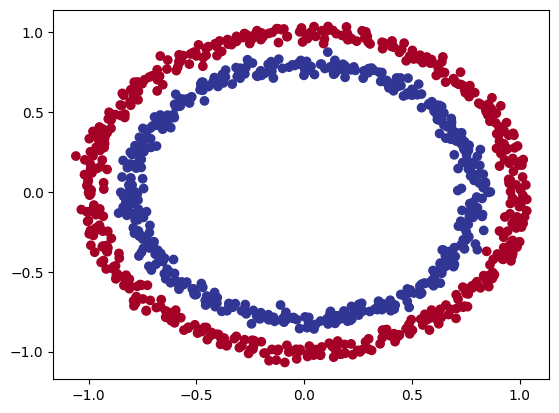

In [9]:
# Visualizar os dados
import matplotlib.pyplot as plt
plt.scatter(x=X[:,0],
            y=X[:,1],
            c=y,
            cmap=plt.cm.RdYlBu)

## 1.2 Tranformar os dados em tensores e criar uma separação de treinamento e test

In [10]:
import torch
torch.__version__

'2.1.0+cu118'

In [11]:
# Transformar os dados em tensores
X = torch.from_numpy(X).type(torch.float32)
y = torch.from_numpy(y).type(torch.float32)

X[:5], y[:5]

(tensor([[ 0.7542,  0.2315],
         [-0.7562,  0.1533],
         [-0.8154,  0.1733],
         [-0.3937,  0.6929],
         [ 0.4422, -0.8967]]),
 tensor([1., 1., 1., 1., 0.]))

In [12]:
# Separar os dados em um conjunto de treinamento e outro de teste
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    test_size=0.2,
                                                    random_state=42)

In [13]:
len(X_train), len(X_test), len(y_train), len(y_test)

(800, 200, 800, 200)

## 2. Construindo um modelo

Vamos criar um modelo para classificar nossos pontos azuis e vermelhos.

Para isso vamos precisar de:
1. Configurar o device agnostic code (código independente do dispositivo)
2. Construir um modelo (subclasses nn.Module)
3. Definir uma loss function e um optimizer
4. Criar um loop de treinamente e teste

In [14]:
import torch
from torch import nn

# Tornar o código indendente do dispositivo
device = "cuda" if torch.cuda.is_available() else "cpu"
device

'cuda'

Agora que configuramos o código independente do dispositivo, vamos criar um modelo:

1. Subclasses `nn.Module` (quase todos os modelos em PyTorch são subclasses de `nn.Module`)
2. Criar duas camadas `nn.Linear()` da RNA que deverão ser capazes de lidar com os formatos (shapes) do nosso dataset
3. Definir um método `forward()`: que faz o delineamento do forward pass (ou passagem forward dos dados pela RNA)
4. Instanciar uma instância da nossa classe do modelo e enviar ela para o target `device`

In [15]:
# 1. Construir um modelo que tem como herança as subclasses nn.Module
class CircleModelv0(nn.Module):
  def __init__(self):
    super().__init__()
    # 2. Criar 2 camadas nn.Linear()
    self.layer_1 = nn.Linear(in_features=2, out_features=5)
    self.layer_2 = nn.Linear(in_features=5, out_features=1)

  # 3. Definir um método forward()
  def forward(self,x):
    return self.layer_2(self.layer_1(x))

# 4. Instanciar uma instância da classe do nosso modelo
model_0 = CircleModelv0().to(device)
model_0

CircleModelv0(
  (layer_1): Linear(in_features=2, out_features=5, bias=True)
  (layer_2): Linear(in_features=5, out_features=1, bias=True)
)

In [16]:
list(model_0.parameters())

[Parameter containing:
 tensor([[ 0.3478, -0.3171],
         [-0.0858, -0.1449],
         [-0.3482, -0.5130],
         [-0.3040, -0.1069],
         [ 0.5707, -0.5902]], device='cuda:0', requires_grad=True),
 Parameter containing:
 tensor([ 0.2335,  0.6773, -0.5821, -0.6099, -0.5107], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([[ 0.3693, -0.2965, -0.3768, -0.1684,  0.1262]], device='cuda:0',
        requires_grad=True),
 Parameter containing:
 tensor([-0.0743], device='cuda:0', requires_grad=True)]

## Vamos visualizar o que está acontecendo com TensorFlow Playground

https://playground.tensorflow.org/

* Escolhas Activation = Linear

In [17]:
model_0.state_dict()

OrderedDict([('layer_1.weight',
              tensor([[ 0.3478, -0.3171],
                      [-0.0858, -0.1449],
                      [-0.3482, -0.5130],
                      [-0.3040, -0.1069],
                      [ 0.5707, -0.5902]], device='cuda:0')),
             ('layer_1.bias',
              tensor([ 0.2335,  0.6773, -0.5821, -0.6099, -0.5107], device='cuda:0')),
             ('layer_2.weight',
              tensor([[ 0.3693, -0.2965, -0.3768, -0.1684,  0.1262]], device='cuda:0')),
             ('layer_2.bias', tensor([-0.0743], device='cuda:0'))])

In [18]:
# Fazer predições
with torch.inference_mode():
  untrained_preds = model_0(X_test.to(device))
print(f"Tamanho das predições: {len(untrained_preds)}, {untrained_preds.shape} ")
print(f"Tamanho do conjunto teste: {len(X_test)}, {X_test.shape} ")

Tamanho das predições: 200, torch.Size([200, 1]) 
Tamanho do conjunto teste: 200, torch.Size([200, 2]) 


In [21]:
print(f"\nPrimeiras 5 predições:\n {torch.round(untrained_preds[:5])}")
print(f"\nPrimeiros 5 labels:\n {y_test[:5]}")


Primeiras 5 predições:
 tensor([[-0.],
        [0.],
        [-0.],
        [0.],
        [0.]], device='cuda:0')

Primeiros 5 labels:
 tensor([1., 0., 1., 0., 1.])


# Selecionar a função perda e o otimizador

Qual função perda e otimizador devemos usar?

A resposta depende do problema em questão..

Para regressão podemos usar **MAE** ou **MSE** (mean absolute error ou mean squared error)

Para classifiação escolhas habituais são **binary cross entropy** ou **categorical cross entropy**.

* Para a `loss function` vamos usar `torch.nn.BCEWithLogitsLoss()`, para mais informações sobre **binary cross entropy (BCE)** veja o artigo: https://towardsdatascience.com/understanding-binary-cross-entropy-log-loss-a-visual-explanation-a3ac6025181a

* Uma definição da função logit: https://en.wikipedia.org/wiki/Logit

Em deep learning a camada  Logit retorna uma probabilidade.


In [22]:
# Configurar a loss function
loss_fn = nn.BCEWithLogitsLoss()

optimizer = torch.optim.SGD(params=model_0.parameters(),
                            lr = 0.1)

In [23]:
# Calcular a acurácia
def accuracy_fn(y_true, y_pred):
  correct = torch.eq(y_true,y_pred).sum().item()
  acc = (correct/len(y_pred)) * 100
  return acc

## 3. Treinamento do modelo

For our prediction probability values, we need to perform a range-style rounging on them:
* `y_pred_probs` >= 0.5, `y=1` (class 1)
* `y_pred_probs` < 0.5, `y=0` (class 0)

In [24]:
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Número de épocas
epochs = 100

# Enviar os dados para o device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# Construir o loop de treinamente e teste
for epoch in range(epochs):
  ### Training
  model_0.train()
  # Forward pass
  y_logits = model_0(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # tornar logits -> probabilidades -> rótulos (zeros ou uns)
  # Calcular a função perda
  loss = loss_fn(y_pred,y_train)
  acc = accuracy_fn(y_true = y_train, y_pred = y_pred)
  # Optimizer zero grad
  optimizer.zero_grad()
  # Loss backward (backpropagation)
  loss.backward()
  # Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_0.eval()
  with torch.inference_mode():
    # Forward pass
    test_logits = model_0(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))
    # Calcular função perda/acurácia
    test_loss = loss_fn(test_logits,y_test)
    test_acc = accuracy_fn(y_true=y_test, y_pred=test_pred)

  # Imprimir os resultados
  if epoch % 10 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.5f}, Acc: {acc:.2f}% |  Test Loss: {test_loss:.5f}, Test Acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 10 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 20 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 30 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 40 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 50 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 60 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 70 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 80 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%
Epoch: 90 | Loss: 0.75511, Acc: 51.00% |  Test Loss: 0.70807, Test Acc: 49.50%


In [25]:
import requests
from pathlib import Path

# Download helper functions from ciencia_dados repo (if it's not already downloaded)
if Path("helper_functions.py").is_file():
  print("helper_functions.py already exists, skipping download")
else:
  print("Downloading helper_functions.py")
  request = requests.get("https://raw.githubusercontent.com/emiliomercuri/ciencia_dados/main/helper_functions.py")
  with open("helper_functions.py", "wb") as f:
    f.write(request.content)

from helper_functions import plot_predictions, plot_decision_boundary

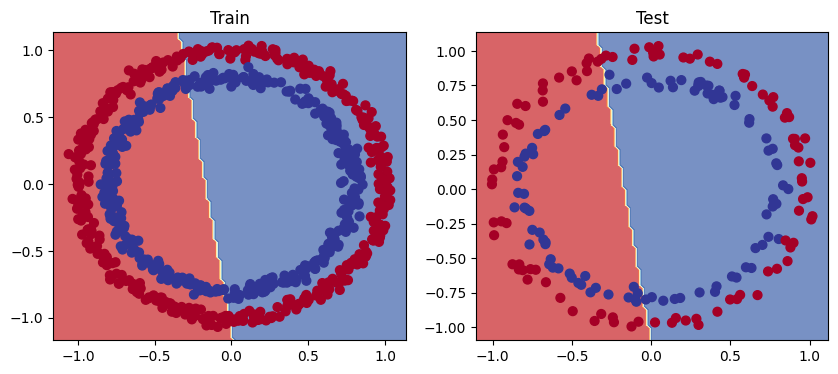

In [26]:
# Plot decision boundary of the model
plt.figure(figsize=(10,4))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_0, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_0, X_test, y_test)

## O que está faltando? -> Não linearidade!

In [34]:
# Build a model with non-linear activation functions
from torch import nn

class CircleModelV2(nn.Module):
  def __init__(self):
    super().__init__()
    self.layer_1 = nn.Linear(in_features=2, out_features=10)
    self.layer_2 = nn.Linear(in_features=10, out_features=10)
    self.layer_3 = nn.Linear(in_features=10, out_features=1)
    self.relu = nn.ReLU() # relu is a non-linear activation function

  def forward(self,x):
    # Where should we put our non-linear activation functions?
    return self.layer_3(self.relu(self.layer_2(self.relu(self.layer_1(x)))))

model_3 = CircleModelV2().to(device)
model_3

CircleModelV2(
  (layer_1): Linear(in_features=2, out_features=10, bias=True)
  (layer_2): Linear(in_features=10, out_features=10, bias=True)
  (layer_3): Linear(in_features=10, out_features=1, bias=True)
  (relu): ReLU()
)

In [35]:
# Setup loss and optimizer
loss_fn = nn.BCEWithLogitsLoss()
optimizer = torch.optim.SGD(model_3.parameters(),
                            lr=0.1)

In [36]:
# Random seeds
torch.manual_seed(42)
torch.cuda.manual_seed(42)

# Put the data on the target device
X_train, y_train = X_train.to(device), y_train.to(device)
X_test, y_test = X_test.to(device), y_test.to(device)

# set the number of epochs
epochs = 3000

for epoch in range(epochs):
  ### Training
  model_3.train()

  # 1. Forward pass
  y_logits = model_3(X_train).squeeze()
  y_pred = torch.round(torch.sigmoid(y_logits)) # logits -> pred probabilities -> prediction labels

  # 2. Calculate the loss/acc
  loss = loss_fn(y_logits, y_train) # BCEWithLogitsLoss (takes in logits as first input)
  acc = accuracy_fn(y_true=y_train,
                    y_pred=y_pred)

  # 3. Optimizer zero grad
  optimizer.zero_grad()

  # 4. Loss backward (backpropagation)
  loss.backward()

  # 5. Optimizer step (gradient descent)
  optimizer.step()

  ### Testing
  model_3.eval()
  with torch.inference_mode():
    # 1. Forward pass
    test_logits = model_3(X_test).squeeze()
    test_pred = torch.round(torch.sigmoid(test_logits))

    # 2. Calculate the loss
    test_loss = loss_fn(test_logits,
                        y_test)
    test_acc = accuracy_fn(y_true=y_test,
                           y_pred=test_pred)

  # Print out what's happenin'
  if epoch % 100 == 0:
    print(f"Epoch: {epoch} | Loss: {loss:.4f}, Acc: {acc:.2f}% | Test loss: {test_loss:.4f} | Test acc: {test_acc:.2f}%")

Epoch: 0 | Loss: 0.6929, Acc: 50.00% | Test loss: 0.6932 | Test acc: 50.00%
Epoch: 100 | Loss: 0.6912, Acc: 52.88% | Test loss: 0.6910 | Test acc: 52.50%
Epoch: 200 | Loss: 0.6898, Acc: 53.37% | Test loss: 0.6894 | Test acc: 55.00%
Epoch: 300 | Loss: 0.6879, Acc: 53.00% | Test loss: 0.6872 | Test acc: 56.00%
Epoch: 400 | Loss: 0.6852, Acc: 52.75% | Test loss: 0.6841 | Test acc: 56.50%
Epoch: 500 | Loss: 0.6810, Acc: 52.75% | Test loss: 0.6794 | Test acc: 56.50%
Epoch: 600 | Loss: 0.6751, Acc: 54.50% | Test loss: 0.6729 | Test acc: 56.00%
Epoch: 700 | Loss: 0.6666, Acc: 58.38% | Test loss: 0.6632 | Test acc: 59.00%
Epoch: 800 | Loss: 0.6516, Acc: 64.00% | Test loss: 0.6476 | Test acc: 67.50%
Epoch: 900 | Loss: 0.6236, Acc: 74.00% | Test loss: 0.6215 | Test acc: 79.00%
Epoch: 1000 | Loss: 0.5682, Acc: 87.75% | Test loss: 0.5738 | Test acc: 86.50%
Epoch: 1100 | Loss: 0.4815, Acc: 93.50% | Test loss: 0.4993 | Test acc: 90.50%
Epoch: 1200 | Loss: 0.3706, Acc: 97.75% | Test loss: 0.4059 | Te

In [37]:
# Makes predictions
model_3.eval()
with torch.inference_mode():
  y_preds = torch.round(torch.sigmoid(model_3(X_test))).squeeze()

y_preds[:10], y_test[:10]

(tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'),
 tensor([1., 0., 1., 0., 1., 1., 0., 0., 1., 0.], device='cuda:0'))

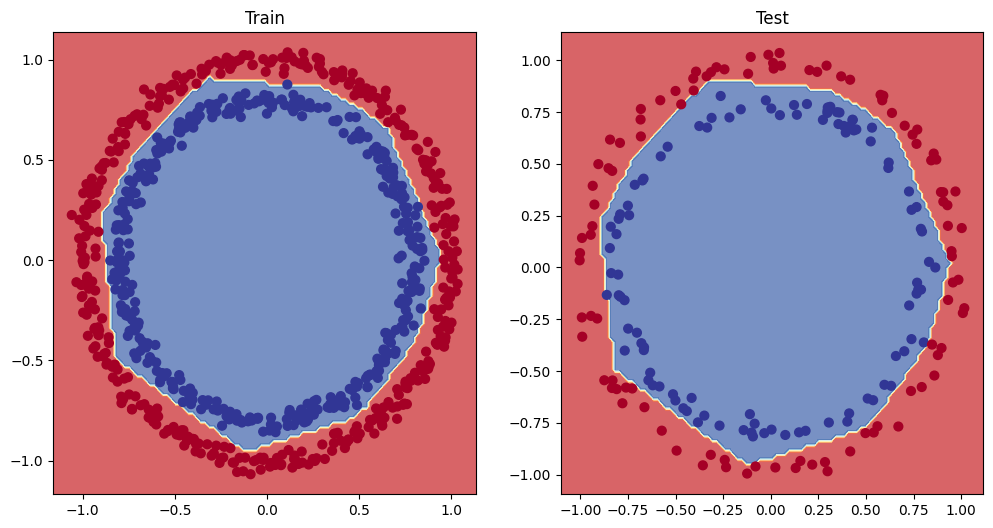

In [38]:
# Plot decision boundaries
plt.figure(figsize=(12,6))
plt.subplot(1,2,1)
plt.title("Train")
plot_decision_boundary(model_3, X_train, y_train)
plt.subplot(1,2,2)
plt.title("Test")
plot_decision_boundary(model_3, X_test, y_test)  # model_3 = non-linearity